<a href="https://colab.research.google.com/github/lopespaloma/predicao-avc-projeto-datascience/blob/main/projeto_A3_previsao_avc_adbd_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO A3 | ANÁLISE DE DADOS E BIG DATA & INTELIGÊNCIA ARTIFICIAL

**Integrantes do grupo**

<br>

NOME | RA
--- | ---
Gustavo Buenos Aires Colpaert | 823126177
Stephany Silva Dantas | 822223694
Paloma Lopes de Sousa | 822167506
Bianca Alves Ribeiro | 8222240261
Lucas Vasconcellos | 8222242709
Sara Alves| 822224386
Fernando Fukunaga | 821232457
<br>

**Descrição do Projeto**

......................................................
.....................................................

## OBTENÇÃO DE DADOS

---



In [1]:
import pandas as pd
import numpy as np

In [2]:
avc_dataset = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter= ';')

## ANÁLISE EXPLORATÓRIA DOS DADOS

In [3]:
avc_dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
avc_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### PREPARAÇÃO DOS DADOS

In [5]:
avc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#Deletando coluna ID
avc_dataset.drop(['id'], axis=1, inplace=True)

In [7]:
# Traduzindo os títulos das colunas para português
avc_dataset.rename(columns= {'age': 'Idade' , 'gender': 'Genero' , 'hypertension': 'Hipertensao',
                      'heart_disease': 'Doenca Cardiaca' , 'ever_married': 'Estado Civil',
                      'work_type': 'Tipo de trabalho', 'Residence_type': 'Localizacao Residencial' ,
                      'avg_glucose_level' : 'Nivel medio de glicose' , 'bmi': 'IMC',
                      'stroke': 'AVC', 'smoking_status': 'Condicao de fumante'}, inplace=True)
avc_dataset.columns

Index(['Genero', 'Idade', 'Hipertensao', 'Doenca Cardiaca', 'Estado Civil',
       'Tipo de trabalho', 'Localizacao Residencial', 'Nivel medio de glicose',
       'IMC', 'Condicao de fumante', 'AVC'],
      dtype='object')

In [8]:
#Identificar tipo 'object' na coluna Genero
avc_dataset['Genero'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
#Contagem de registros na coluna 'Genero' para substituição posterior por número mais frequente (moda)
avc_dataset['Genero'].value_counts()

Female    2994
Male      2115
Other        1
Name: Genero, dtype: int64

In [10]:
#Contagem de registros na coluna 'Condição de fumante' para substituição por moda
avc_dataset['Condicao de fumante'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Condicao de fumante, dtype: int64

In [11]:
#Substituindo strings por valores lógicos + substituições por valores frequentes
avc_dataset.replace({'Other':0, 'Female': 0, 'Male': 1,
                    'No': 0, 'Yes': 1,
                    'Urban': 0, 'Rural': 1,
                    'Unknown':0, 'never smoked':0 ,'smokes': 1, 'formerly smoked': 2,
                    'children':0, 'Never_worked':0,'Private':1, 'Self-employed':2,'Govt_job':3 }, inplace=True)

In [12]:
#Verificando valores nulos
avc_dataset.isnull().sum()

Genero                       0
Idade                        0
Hipertensao                  0
Doenca Cardiaca              0
Estado Civil                 0
Tipo de trabalho             0
Localizacao Residencial      0
Nivel medio de glicose       0
IMC                        201
Condicao de fumante          0
AVC                          0
dtype: int64

In [13]:
#Substituindo valores nulos ('NaN') da coluna IMC pela média
avc_dataset['IMC'].fillna(avc_dataset['IMC'].median(), inplace=True)

In [14]:
#avc_dataset.replace({'Other':'F', 'Female': 'M','Male': 'M',
                    # 'No': 'Solteiro', 'Yes': 'Casado',
                    # 'Urban': 'Urbana', 'Rural': 'Rural',
                    # 'Unknown':'Nunca fumou', 'never smoked':'Nunca fumou' ,'smokes': 'Fuma', 'formerly smoked': 'Ex-Fumante',
                    # 'children':'Nunca trabalhou', 'Never_worked':'Nunca trabalhou','Private':'Privado', 'Self-employed':'Autonomo','Govt_job':'Publico' }, inplace=True)

In [15]:
#avc_dataset.to_csv('dados-tratados.csv', index=False) p/ power BI

In [16]:
avc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genero                   5110 non-null   int64  
 1   Idade                    5110 non-null   float64
 2   Hipertensao              5110 non-null   int64  
 3   Doenca Cardiaca          5110 non-null   int64  
 4   Estado Civil             5110 non-null   int64  
 5   Tipo de trabalho         5110 non-null   int64  
 6   Localizacao Residencial  5110 non-null   int64  
 7   Nivel medio de glicose   5110 non-null   float64
 8   IMC                      5110 non-null   float64
 9   Condicao de fumante      5110 non-null   int64  
 10  AVC                      5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [17]:
avc_dataset

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1,67.0,0,1,1,1,0,228.69,36.6,2,1
1,0,61.0,0,0,1,2,1,202.21,28.1,0,1
2,1,80.0,0,1,1,1,1,105.92,32.5,0,1
3,0,49.0,0,0,1,1,0,171.23,34.4,1,1
4,0,79.0,1,0,1,2,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,0,83.75,28.1,0,0
5106,0,81.0,0,0,1,2,0,125.20,40.0,0,0
5107,0,35.0,0,0,1,2,1,82.99,30.6,0,0
5108,1,51.0,0,0,1,1,1,166.29,25.6,2,0


In [18]:
#Normalização de valores
avc=(avc_dataset-avc_dataset.min())/(avc_dataset.max()-avc_dataset.min())
avc

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1.0,0.816895,0.0,1.0,1.0,0.333333,0.0,0.801265,0.301260,1.0,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.666667,1.0,0.679023,0.203895,0.0,1.0
2,1.0,0.975586,0.0,1.0,1.0,0.333333,1.0,0.234512,0.254296,0.0,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.333333,0.0,0.536008,0.276060,0.5,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.666667,1.0,0.549349,0.156930,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.975586,1.0,0.0,1.0,0.333333,0.0,0.132167,0.203895,0.0,0.0
5106,0.0,0.987793,0.0,0.0,1.0,0.666667,0.0,0.323516,0.340206,0.0,0.0
5107,0.0,0.426270,0.0,0.0,1.0,0.666667,1.0,0.128658,0.232532,0.0,0.0
5108,1.0,0.621582,0.0,0.0,1.0,0.333333,1.0,0.513203,0.175258,1.0,0.0


###Separação de valores (0 e 1) na coluna AVC

In [19]:
#Contagem valores AVC = 0/1
avc['AVC'].value_counts()

0.0    4861
1.0     249
Name: AVC, dtype: int64

In [20]:
#Separando dataframe registros de pacientes que não tiveram avc, isto é = 0
avc_negativo = avc.loc[avc['AVC'] == 0]
avc_negativo = avc_negativo.sample(n=249)
avc_negativo

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
4217,1.0,0.780273,1.0,0.0,1.0,0.666667,1.0,0.140984,0.208477,0.0,0.0
2257,0.0,0.865723,0.0,0.0,1.0,0.333333,0.0,0.857215,0.195876,0.0,0.0
2675,0.0,0.841309,1.0,0.0,1.0,1.000000,0.0,0.706675,0.255441,1.0,0.0
302,1.0,0.536133,0.0,0.0,1.0,0.333333,1.0,0.123350,0.169530,0.0,0.0
671,1.0,0.743652,0.0,1.0,1.0,0.333333,0.0,0.153033,0.203895,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4783,1.0,0.108887,0.0,0.0,0.0,0.000000,0.0,0.050734,0.068729,0.0,0.0
1882,0.0,0.365234,0.0,0.0,1.0,0.333333,0.0,0.058443,0.216495,0.5,0.0
3136,1.0,0.438477,0.0,0.0,1.0,0.333333,1.0,0.488782,0.214204,0.5,0.0
4431,0.0,0.694824,0.0,0.0,1.0,0.333333,1.0,0.042702,0.257732,0.0,0.0


In [21]:
#Separando dataframe registros de pacientes que tiveram avc, isto é = 1
avc_positivo = avc.loc[avc['AVC'] == 1]
avc_positivo

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1.0,0.816895,0.0,1.0,1.0,0.333333,0.0,0.801265,0.301260,1.0,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.666667,1.0,0.679023,0.203895,0.0,1.0
2,1.0,0.975586,0.0,1.0,1.0,0.333333,1.0,0.234512,0.254296,0.0,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.333333,0.0,0.536008,0.276060,0.5,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.666667,1.0,0.549349,0.156930,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
244,1.0,0.694824,0.0,0.0,1.0,0.333333,1.0,0.137753,0.302405,0.0,1.0
245,0.0,0.169922,0.0,0.0,0.0,0.000000,1.0,0.012972,0.235968,0.0,1.0
246,0.0,0.914551,0.0,0.0,1.0,0.666667,1.0,0.109316,0.217640,1.0,1.0
247,1.0,0.865723,1.0,0.0,1.0,0.666667,1.0,0.150863,0.203895,0.0,1.0


In [22]:
#Concatenando os registros totais e randomizando os valores
avc = pd.concat([avc_positivo, avc_negativo], ignore_index=True)
avc = avc.sample(frac=1).reset_index(drop=True)

In [23]:
avc.head(500)

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,0.0,0.670410,0.0,1.0,0.0,0.333333,1.0,0.251916,0.136312,0.5,0.0
1,0.0,0.694824,1.0,0.0,1.0,1.000000,1.0,0.056735,0.258877,0.0,1.0
2,0.0,0.829102,1.0,0.0,1.0,0.666667,1.0,0.696935,0.187858,0.0,1.0
3,0.0,0.023438,0.0,0.0,0.0,0.000000,0.0,0.322731,0.108820,0.0,0.0
4,0.0,0.658203,0.0,0.0,1.0,0.666667,1.0,0.631059,0.344788,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
493,0.0,0.023438,0.0,0.0,0.0,0.000000,1.0,0.327763,0.166094,0.0,0.0
494,0.0,1.000000,1.0,1.0,1.0,0.666667,0.0,0.214385,0.242841,0.0,0.0
495,0.0,1.000000,0.0,0.0,1.0,0.333333,1.0,0.119287,0.268041,1.0,0.0
496,1.0,0.743652,1.0,0.0,1.0,0.666667,1.0,0.096898,0.194731,0.5,1.0


## TREINAMENTO DO MODELO - ÁRVORE DE DECISÃO

In [24]:
avc.columns

Index(['Genero', 'Idade', 'Hipertensao', 'Doenca Cardiaca', 'Estado Civil',
       'Tipo de trabalho', 'Localizacao Residencial', 'Nivel medio de glicose',
       'IMC', 'Condicao de fumante', 'AVC'],
      dtype='object')

In [25]:
x = avc[['Genero', 'Idade', 'Hipertensao', 'Doenca Cardiaca', 'Estado Civil',
        'Tipo de trabalho', 'Localizacao Residencial', 'Nivel medio de glicose',
        'IMC', 'Condicao de fumante']]
y = avc['AVC']

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(treino_x, treino_y)

predictions = clf.predict(teste_x)

print(predictions)

[0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0.]


In [27]:
print("\nMatriz de confusão detalhada:\n",
    pd.crosstab(teste_y, predictions, rownames= ['Real'], colnames=['Predito'],
                margins=True, margins_name ='Todos'))


Matriz de confusão detalhada:
 Predito  0.0  1.0  Todos
Real                    
0.0       54   22     76
1.0        9   65     74
Todos     63   87    150


## AVALIAÇÃO DO MODELO

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
acuracia = accuracy_score(teste_y, predictions)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.80


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78        76
         1.0       0.75      0.89      0.81        74

    accuracy                           0.80       150
   macro avg       0.81      0.80      0.80       150
weighted avg       0.81      0.80      0.80       150



In [ ]:
scores = []
for i in range (500):
  treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)
  model = tree.DecisionTreeClassifier()
  model.fit(treino_x, treino_y)
  precisao = model.score(teste_x, teste_y)
  scores.append(precisao)

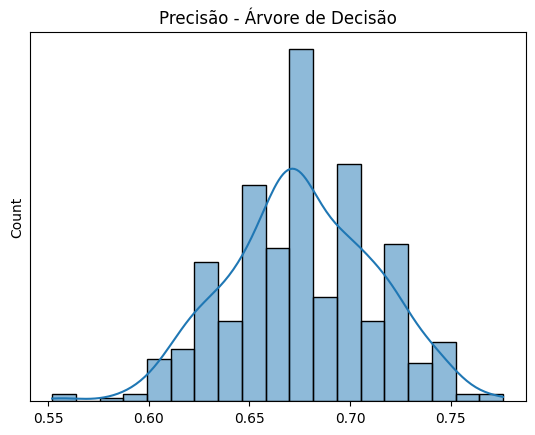

In [ ]:
sns.histplot(scores, kde=True)
plt.yticks([])
plt.title("Precisão - Árvore de Decisão")
plt.show()

In [ ]:
resultado = 0
for i in scores:
  resultado += i
media = resultado / len(scores)
media

0.6760960000000008